In [5]:
# Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [7]:
# Step 2: Load Dataset
df = pd.read_csv(r"C:\Users\shash\Desktop\General Folder\Student Performance Prediction System\student\student-por.csv", delimiter=';')
print("Shape of data:", df.shape)
print("Data types:\n", df.dtypes.value_counts())
print("Null values:", df.isnull().sum().sum())

Shape of data: (649, 33)
Data types:
 object    17
int64     16
Name: count, dtype: int64
Null values: 0


In [ ]:
# Define features and target
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

In [8]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

NameError: name 'X' is not defined

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [ ]:
# Train & Evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        'MAE': round(mae, 2),
        'RMSE': round(rmse, 2),
        'R2 Score': round(r2, 2)
    }

In [ ]:
# Show Results
results_df = pd.DataFrame(results).T
print("\n🔍 Model Performance Comparison:\n", results_df)


🔍 Model Performance Comparison:
                     MAE  RMSE  R2 Score
Linear Regression  0.77  1.21      0.85
Ridge Regression   0.77  1.21      0.85
Lasso Regression   0.71  1.15      0.86
Random Forest      0.75  1.24      0.84
Gradient Boosting  0.79  1.34      0.82


In [ ]:
# Feature Importance from Random Forest
rf_model = models['Random Forest']
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

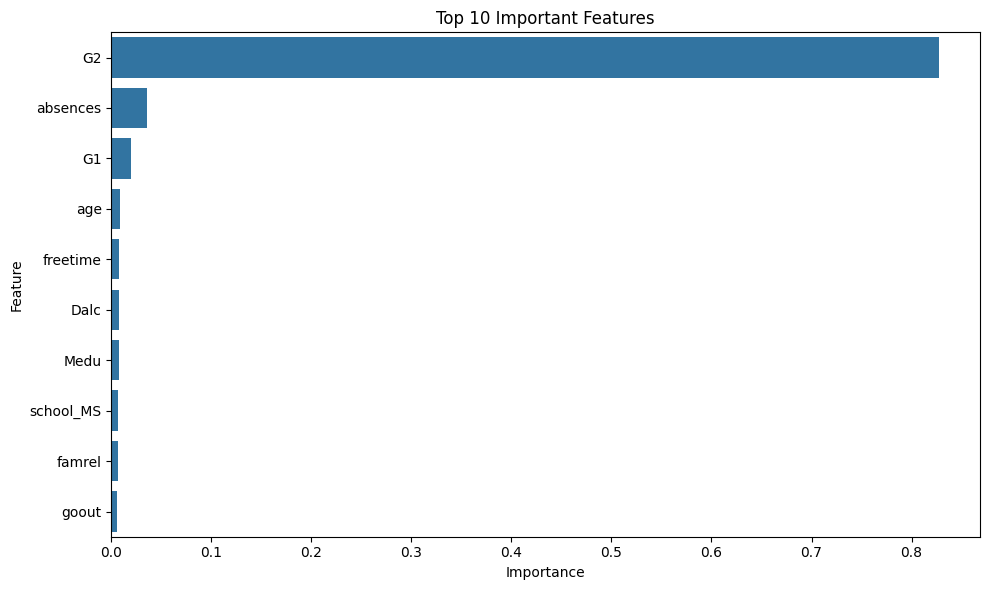

In [ ]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Important Features')
plt.tight_layout()
plt.show()

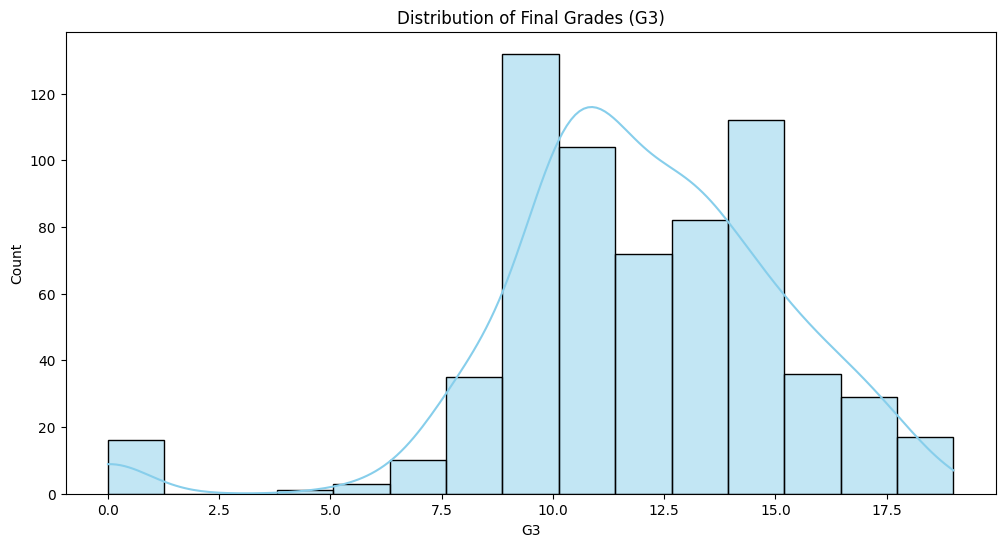

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.histplot(df['G3'], kde=True, bins=15, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.show()

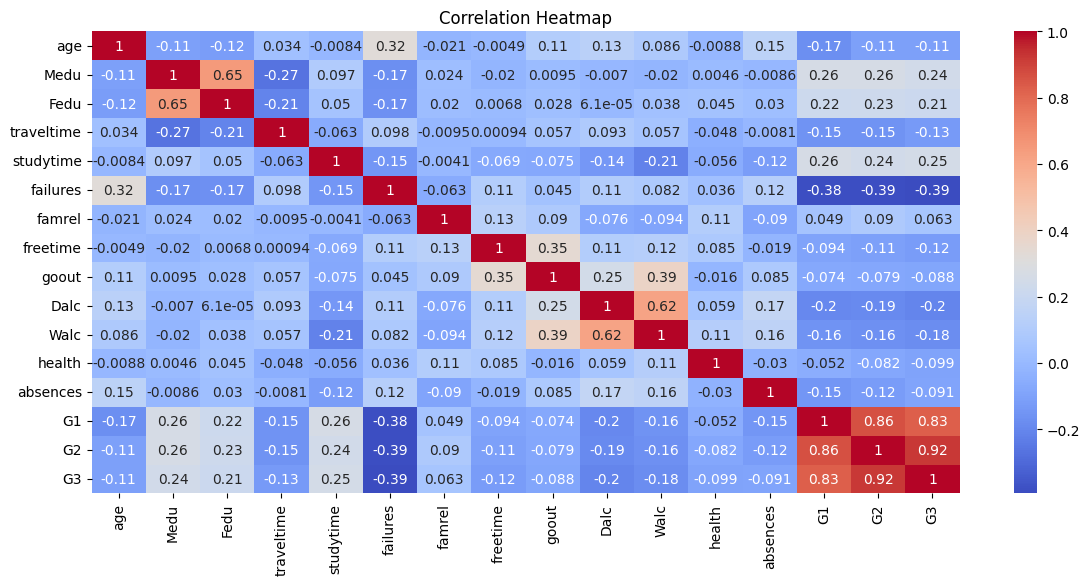

In [ ]:
plt.figure(figsize=(14, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
# Step 4: Preprocessing
df_encoded = pd.get_dummies(df, drop_first=True)
X = df_encoded.drop('G3', axis=1)
y = df_encoded['G3']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 5: Define Evaluation Function
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    return {'MAE': round(mae, 2), 'RMSE': round(rmse, 2), 'R2': round(r2, 2)}, y_pred


In [ ]:
# Step 6: Train Models
lr_model = LinearRegression()
lr_results, lr_pred = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_results, rf_pred = evaluate_model(rf_model, X_train_scaled, X_test_scaled, y_train, y_test)

In [ ]:
# Step 7: Compare Results
results_df = pd.DataFrame([lr_results, rf_results], index=['Linear Regression', 'Random Forest'])
print("\nModel Comparison:\n", results_df)


Model Comparison:
                     MAE  RMSE    R2
Linear Regression  0.77  1.21  0.85
Random Forest      0.75  1.24  0.84


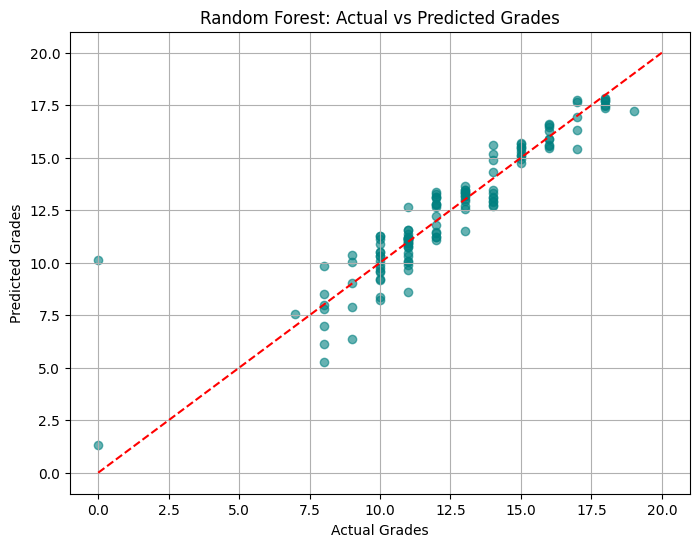

In [ ]:
# Step 8: Visualizations
# Actual vs Predicted (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, rf_pred, color='teal', alpha=0.6)
plt.plot([0, 20], [0, 20], 'r--')
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Random Forest: Actual vs Predicted Grades')
plt.grid(True)
plt.show()

C:\Users\shash\AppData\Local\Temp\ipykernel_19936\1424889033.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')


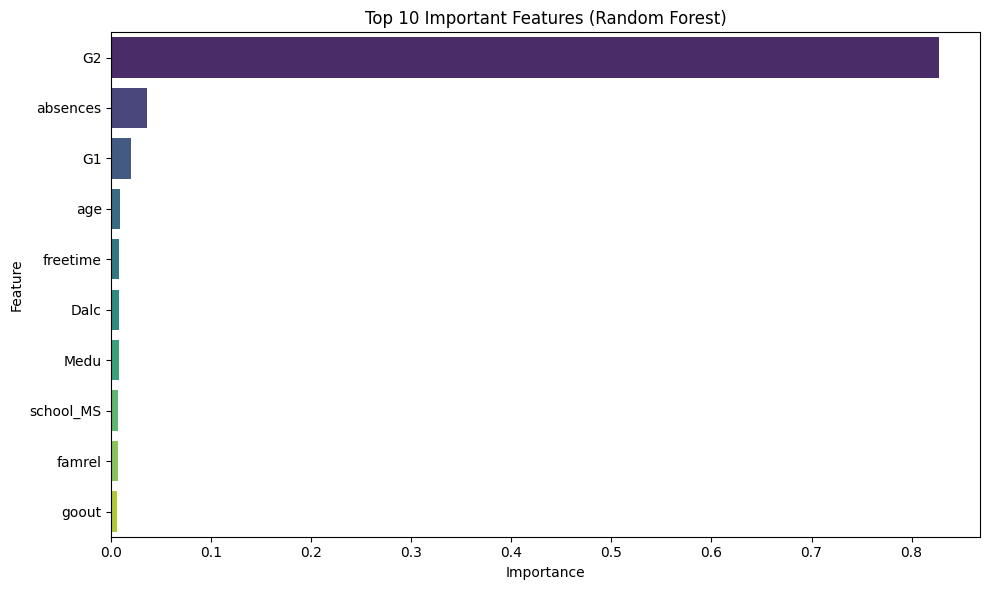

In [ ]:
importances = rf_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
top_features = importance_df.sort_values(by='Importance', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# y_test: actual grades, y_pred: predicted grades
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")


NameError: name 'y_test' is not defined